<center>
<h1>CSC-343 ARTIFICIAL INTELLIGENCE</h1>
<h1>PROGRAMMING ASSIGNMENT 8</h1>
<h1>PERCEPTRON</h1>
</center>

<br/>
<hr/>
<br/>

<center>

<img width="80%" style="float:left" src="https://raw.githubusercontent.com/fahadsultan/csc343/main/assets/imgs/perceptron.png">

<center>

<br/>
<hr/>
<br/>

## Imports

In [1]:
import pandas as pd 
import numpy  as np 
from matplotlib import pyplot as plt 
from tqdm import tqdm 
%matplotlib inline

## Reading Data

In [2]:
data  = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/csc343/main/data/uscities.csv', index_col='city')
river = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/csc343/main/data/savannah.csv')
river = river[280:-70]

data  = data[data['state_name'].apply(lambda x: x in ['Georgia', 'South Carolina'])]
data  = data[~data.index.duplicated(keep='last')]

X     = data[['lng', 'lat']]
y     = (data['state_name'] == 'South Carolina').astype(int)

In [3]:
X[0] = 1 

<ipython-input-3-c78e1c1abc20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[0] = 1


In [4]:
X

,lng,lat,0
city,,,
Atlanta,-84.4224,33.7627,1
Augusta,-82.0708,33.3645,1
Savannah,-81.1784,32.0281,1
Columbus,-84.8771,32.5100,1
Gainesville,-83.8301,34.2903,1
...,...,...,...
Islandton,-80.9359,32.9093,1
Jenkinsville,-81.2875,34.3128,1
Gramling,-82.1332,35.0782,1


In [5]:
pd.concat([X, y], axis=1)

,lng,lat,0,state_name
city,,,,
Atlanta,-84.4224,33.7627,1,0
Augusta,-82.0708,33.3645,1,0
Savannah,-81.1784,32.0281,1,0
Columbus,-84.8771,32.5100,1,0
Gainesville,-83.8301,34.2903,1,0
...,...,...,...,...
Islandton,-80.9359,32.9093,1,1
Jenkinsville,-81.2875,34.3128,1,1
Gramling,-82.1332,35.0782,1,1


## Plotting Data

In [6]:
def plot_data(X, y, title):

  fig = plt.figure(figsize=(50, 20))

  ga, sc = X[y==0], X[y==1]

  for X_state, color in [(ga, "red"), (sc, "blue")]:

    plt.scatter(X_state['lng'], X_state['lat'], c=color, s=70, figure=fig)

    [plt.annotate(X_state.index[i],\
        (X_state.iloc[i]['lng'], X_state.iloc[i]['lat']), \
        fontsize=10) \
      for i in range(len(X_state.index))]

  plt.title(title, fontsize=30);
  plt.grid()

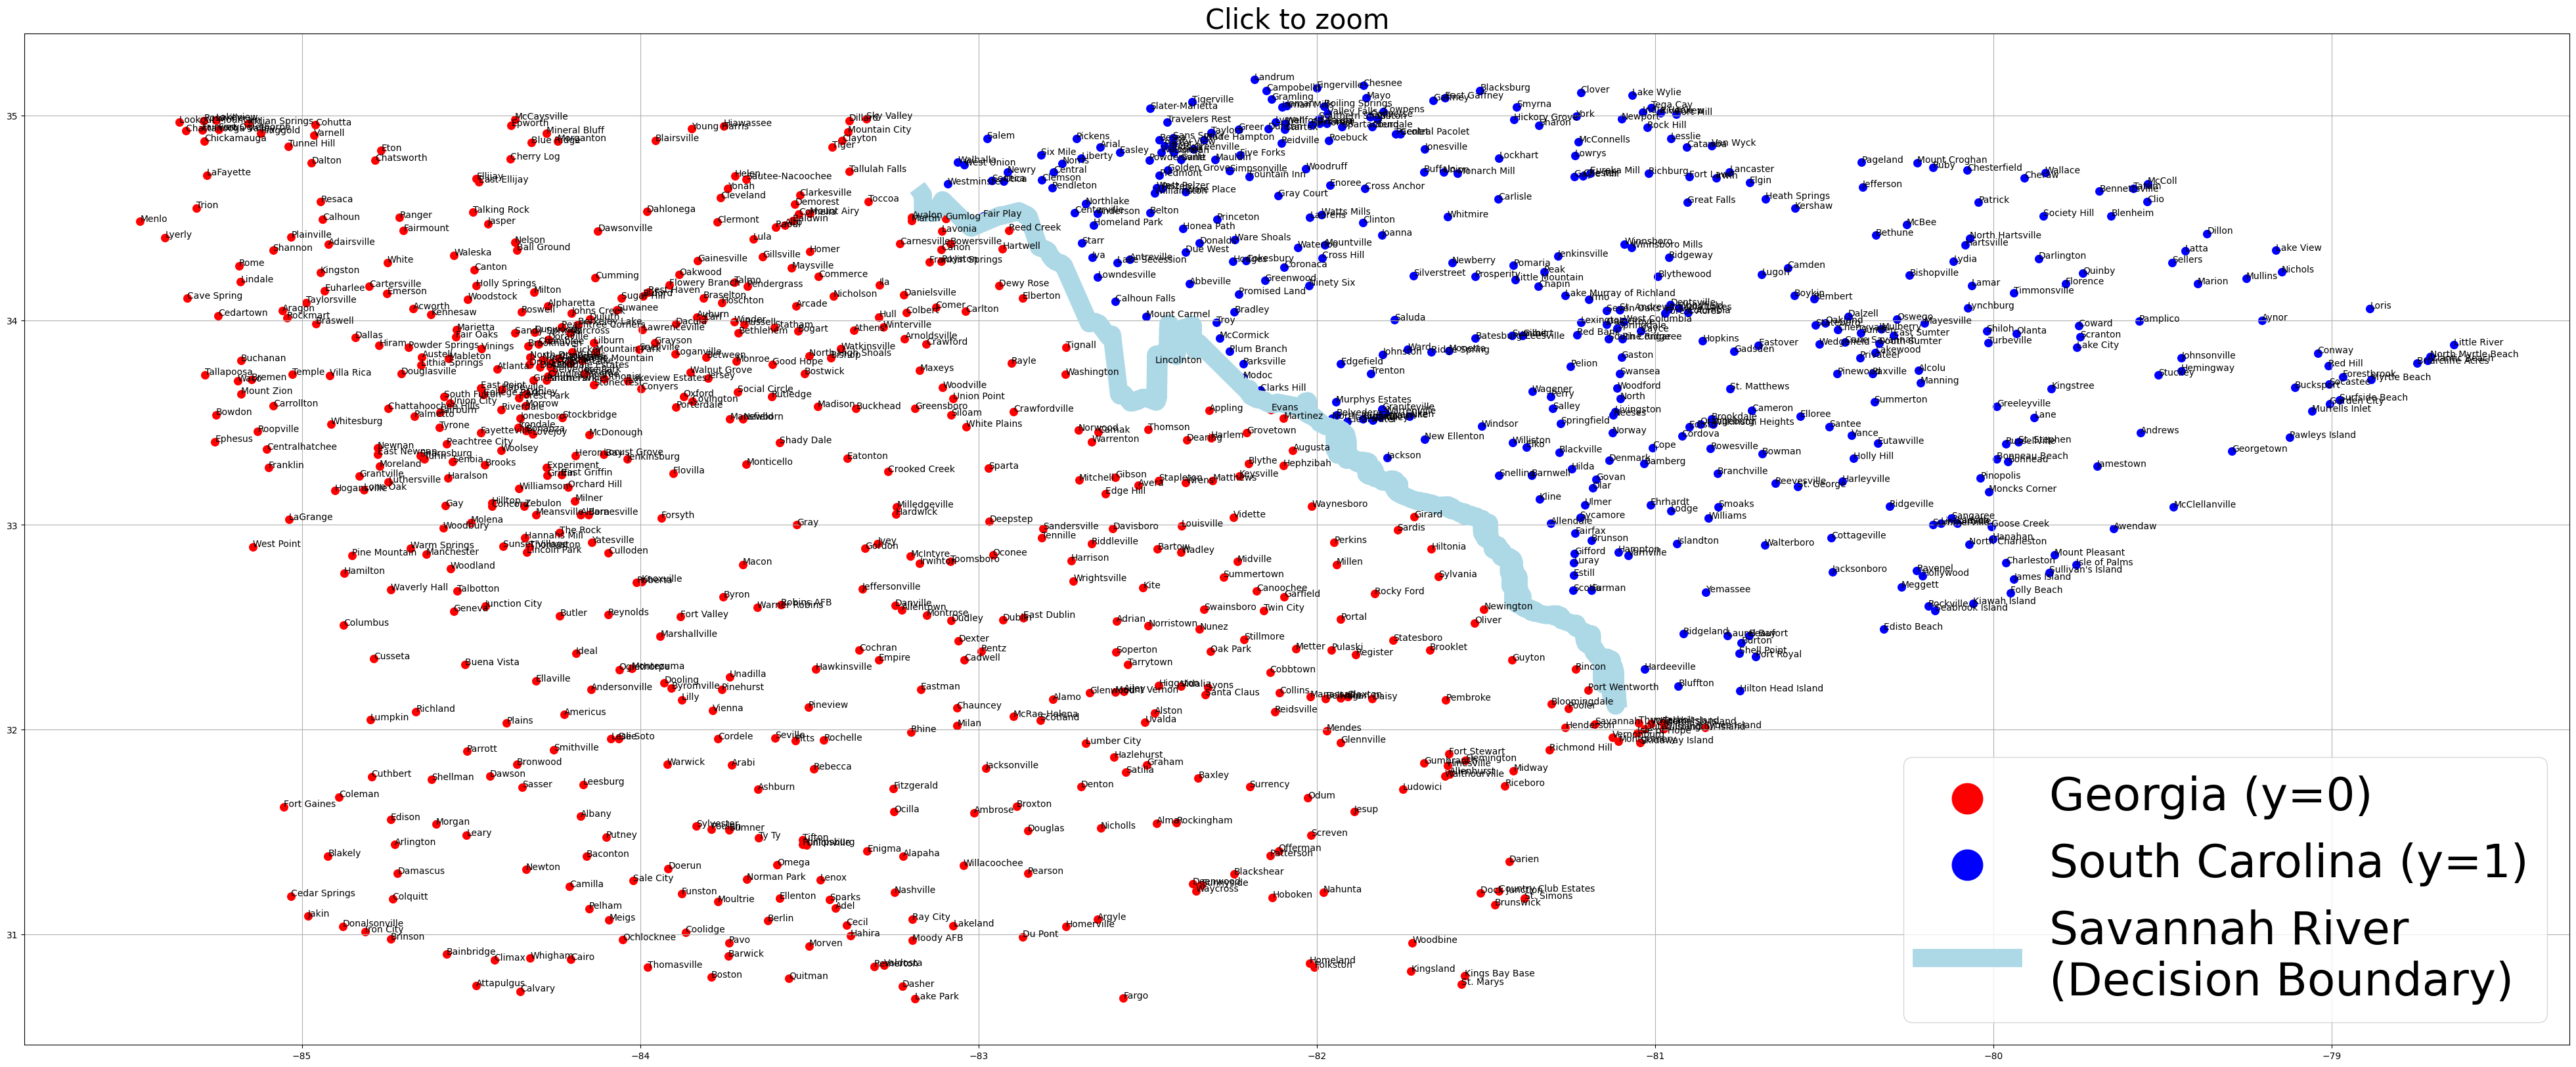

In [7]:
plot_data(X, y, title='Click to zoom')

plt.plot(river['0'], river['1'], linewidth=20, color='lightblue')

plt.legend(['Georgia (y=0)', 'South Carolina (y=1)', \
            'Savannah River\n(Decision Boundary)'], fontsize=50, markerscale=4);

<br/>
<hr/>
<br/>

## Question 1. 

Write a function that takes <u>**randomly**</u>  **splits** the data into **75% training** set and **25% test** set. 


In [8]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y,\
#                                                     test_size=0.25, random_state = 343)

In [9]:
train_cities = list(set(X.sample(frac=0.75).index))

test_cities = list(set(X.index).difference(train_cities))

X_train, y_train = X.loc[train_cities], y.loc[train_cities]
X_test, y_test = X.loc[test_cities], y.loc[test_cities]

# plot_data(X_train, y_train, "Training set")

# plt.figure()
# plot_data(X_test, y_test, "Test set")

<br/>
<hr/>
<br/>

# Question 2. 

Implement the **Perceptron learning** algorithm to learn if given city is in South Carolina or not. 

<img width="80%" src="https://raw.githubusercontent.com/fahadsultan/csc343/main/assets/imgs/perceptron_algo.png">

Your code should take as **inputs**: 

1. Data $~(\mathbf{X}$, $\mathbf{y}$)

  * where $\mathbf{X}_i$ represents (Longitude, Latitude) of $i^{th}$ city
  * $\mathbf{y}_i$ is $1$ if state of $i^{th}$ city is South Carolina and $0$ otherwise

2. Learning rate $~\alpha$
3. Max iterations $~\text{epoch}$

and returns as **output**: 

* A matrix of weights $\mathbf{W}$ of dimensions ($\text{epoch} \times 3) $ where value $\mathbf{W}_{i, j}$ represents weight $w_j$ at epoch $i$.

    * That is, `len(weights) == epoch` _and_ `len(weights[0]) == 3`
\ 

ONLY USE <u>TRAIN SET</u> FOR LEARNING! 

In [10]:
from tqdm import tqdm 

epoch = 100 #aka max_iter
alpha = 0.05
threshold = 0

Ws = [] 
accuracies = []

w = [1, 1, 1]

for iter in tqdm(range(epoch)):

  wrong_preds = 0

  for i in range(len(X_train)):

    x = X_train.iloc[i]

    activation = sum(x * w)

    y_hat = 1 if activation > threshold else 0

    delta = y_train.iloc[i] - y_hat

    wrong_preds = wrong_preds + abs(delta)

    w = w + alpha * delta * x

    Ws.append(w)

  accuracies.append(1-(wrong_preds/len(X_train)))
  

100%|██████████| 100/100 [00:39<00:00,  2.54it/s]


<br/>
<hr/>
<br/>

In [11]:
np.mean(accuracies)

0.7838191632928474

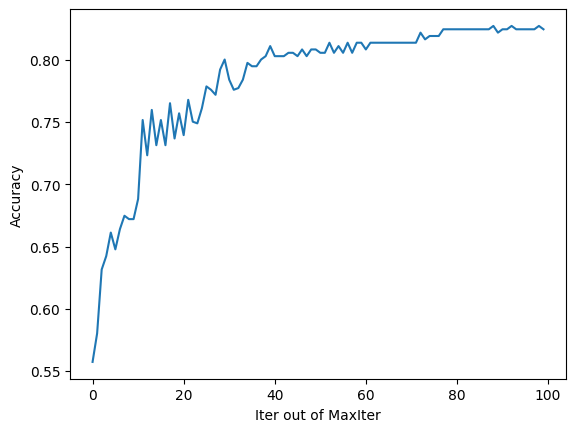

In [12]:
plt.plot(accuracies);
plt.xlabel('Iter out of MaxIter');
plt.ylabel('Accuracy');

# Question 3. Plot weights

Plot the evolution of weights in the perceptron learning from Q3. using boilerplate code below

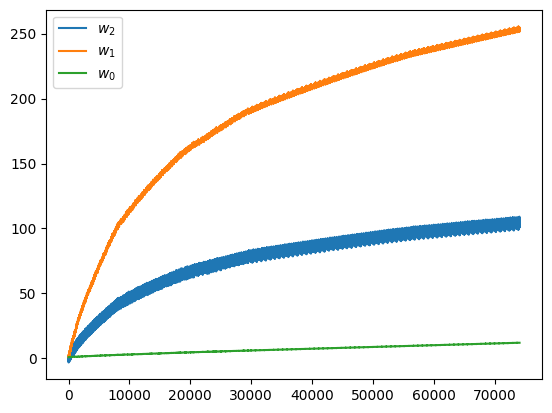

In [13]:
Ws = pd.DataFrame(Ws);
Ws.index = range(len(Ws));

# sample_weights = [[100**2-i**3, 400**2-i**2.9, 10**2-i**2.8] for i in range(1, 100)]

plt.plot(Ws);
plt.legend(["$w_2$", "$w_1$", "$w_0$"]);

<br/>
<hr/>
<br/>

# Question 4. Draw learning curve

Evaluate your perceptron algorithm for the <u>**train set**</u> using the following evaluation metrics: 

\

1. Precision 
$$ \text{precision} = \frac{TP}{TP+FP}$$

2. Recall
$$ \text{recall} = \frac{TP}{TP+FN}$$
3. F1-score 
$$ \text{F$_1$} = 2 \cdot \frac{precision \cdot recall}{precision+recall}$$

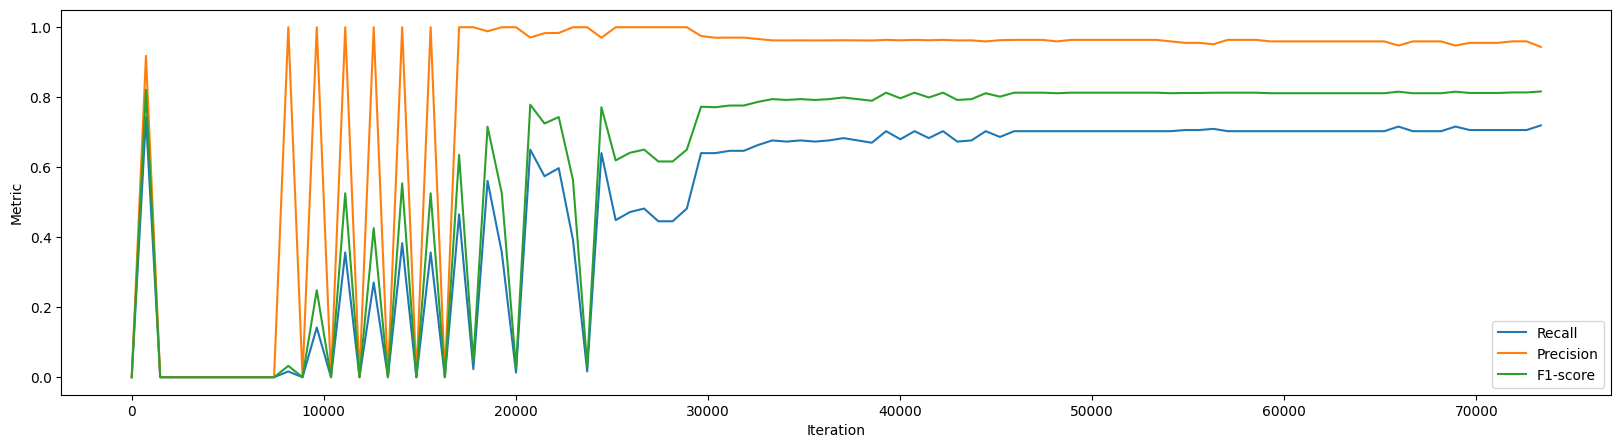

In [14]:
def compute_metrics_train(weights):
  
  preds = X_train.apply(lambda x: sum(x.values * weights.values) > threshold, axis=1).astype(int)

  comparison = pd.concat([y_train, preds], axis=1)
  comparison.columns = ['truth', 'my_pred']

  tp = comparison.apply(lambda x: x['truth'] == 1 and x['my_pred'] == 1, axis=1)#.sum()
  fp = comparison.apply(lambda x: x['truth'] == 0 and x['my_pred'] == 1, axis=1)#.sum()
  tn = comparison.apply(lambda x: x['truth'] == 0 and x['my_pred'] == 0, axis=1)#.sum()
  fn = comparison.apply(lambda x: x['truth'] == 1 and x['my_pred'] == 0, axis=1)#.sum() 

  recall    = sum(tp) / (sum(tp) + sum(fn))
  precision = sum(tp) / (sum(tp) + sum(fp)) if (sum(tp) + sum(fp)) > 0 else 0
  f1_score  = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

  return pd.Series({'recall': recall, 'precision': precision, 'f1_score': f1_score})

metrics = Ws[::len(X_train)].apply(compute_metrics_train, axis=1)

plt.figure(figsize=(20, 5))
plt.plot(metrics['recall'])
plt.plot(metrics['precision'])
plt.plot(metrics['f1_score'])

plt.legend(['Recall', 'Precision', 'F1-score']);

plt.xlabel('Iteration');
plt.ylabel('Metric');

<br/>
<hr/>
<br/>

# Question 5. Compute score for test set

Evaluate your perceptron algorithm on the <u>**test set**</u> using the following evaluation metrics: 

1. Recall 
2. Precision 
3. F1-score 


Go back to Q2. and adjust your hyperparameters to improve your scores, if needed.

In [15]:
final_weights = Ws.iloc[-1]

preds = X_test.apply(lambda x: sum(x.values * final_weights.values) > threshold, axis=1).astype(int)

comparison = pd.concat([preds, y_test], axis=1)
comparison.columns = ['preds', 'truth']

fp = comparison.apply(lambda x: x['preds'] == 1 and x['truth'] == 0, axis=1)
fn = comparison.apply(lambda x: x['preds'] == 0 and x['truth'] == 1, axis=1)
tp = comparison.apply(lambda x: x['preds'] == 1 and x['truth'] == 1, axis=1)
tn = comparison.apply(lambda x: x['preds'] == 0 and x['truth'] == 0, axis=1)

recall    = sum(tp) / (sum(tp) + sum(fn))
precision = sum(tp) / (sum(tp) + sum(fp)) if (sum(tp) + sum(fp)) > 0 else 0
f1_score  = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Recall: %0.2f \nPrecision: %0.2f \nF1-score: %0.2f" % (recall, precision, f1_score))

Recall: 0.70 
Precision: 0.98 
F1-score: 0.82


# ERROR ANALYSIS

In [16]:
final_weights = Ws.iloc[-1]
preds = X_test.apply(lambda x: sum(x.values * final_weights.values) > threshold, axis=1).astype(int)

comparison = pd.concat([y_test, preds], axis=1)
comparison.columns = ['truth', 'my_pred']

mistakes = comparison[comparison['truth'] != comparison['my_pred']]
mistakes_X = X.loc[mistakes.index]

correct = comparison[comparison['truth'] == comparison['my_pred']]
correct_X = X.loc[correct.index]

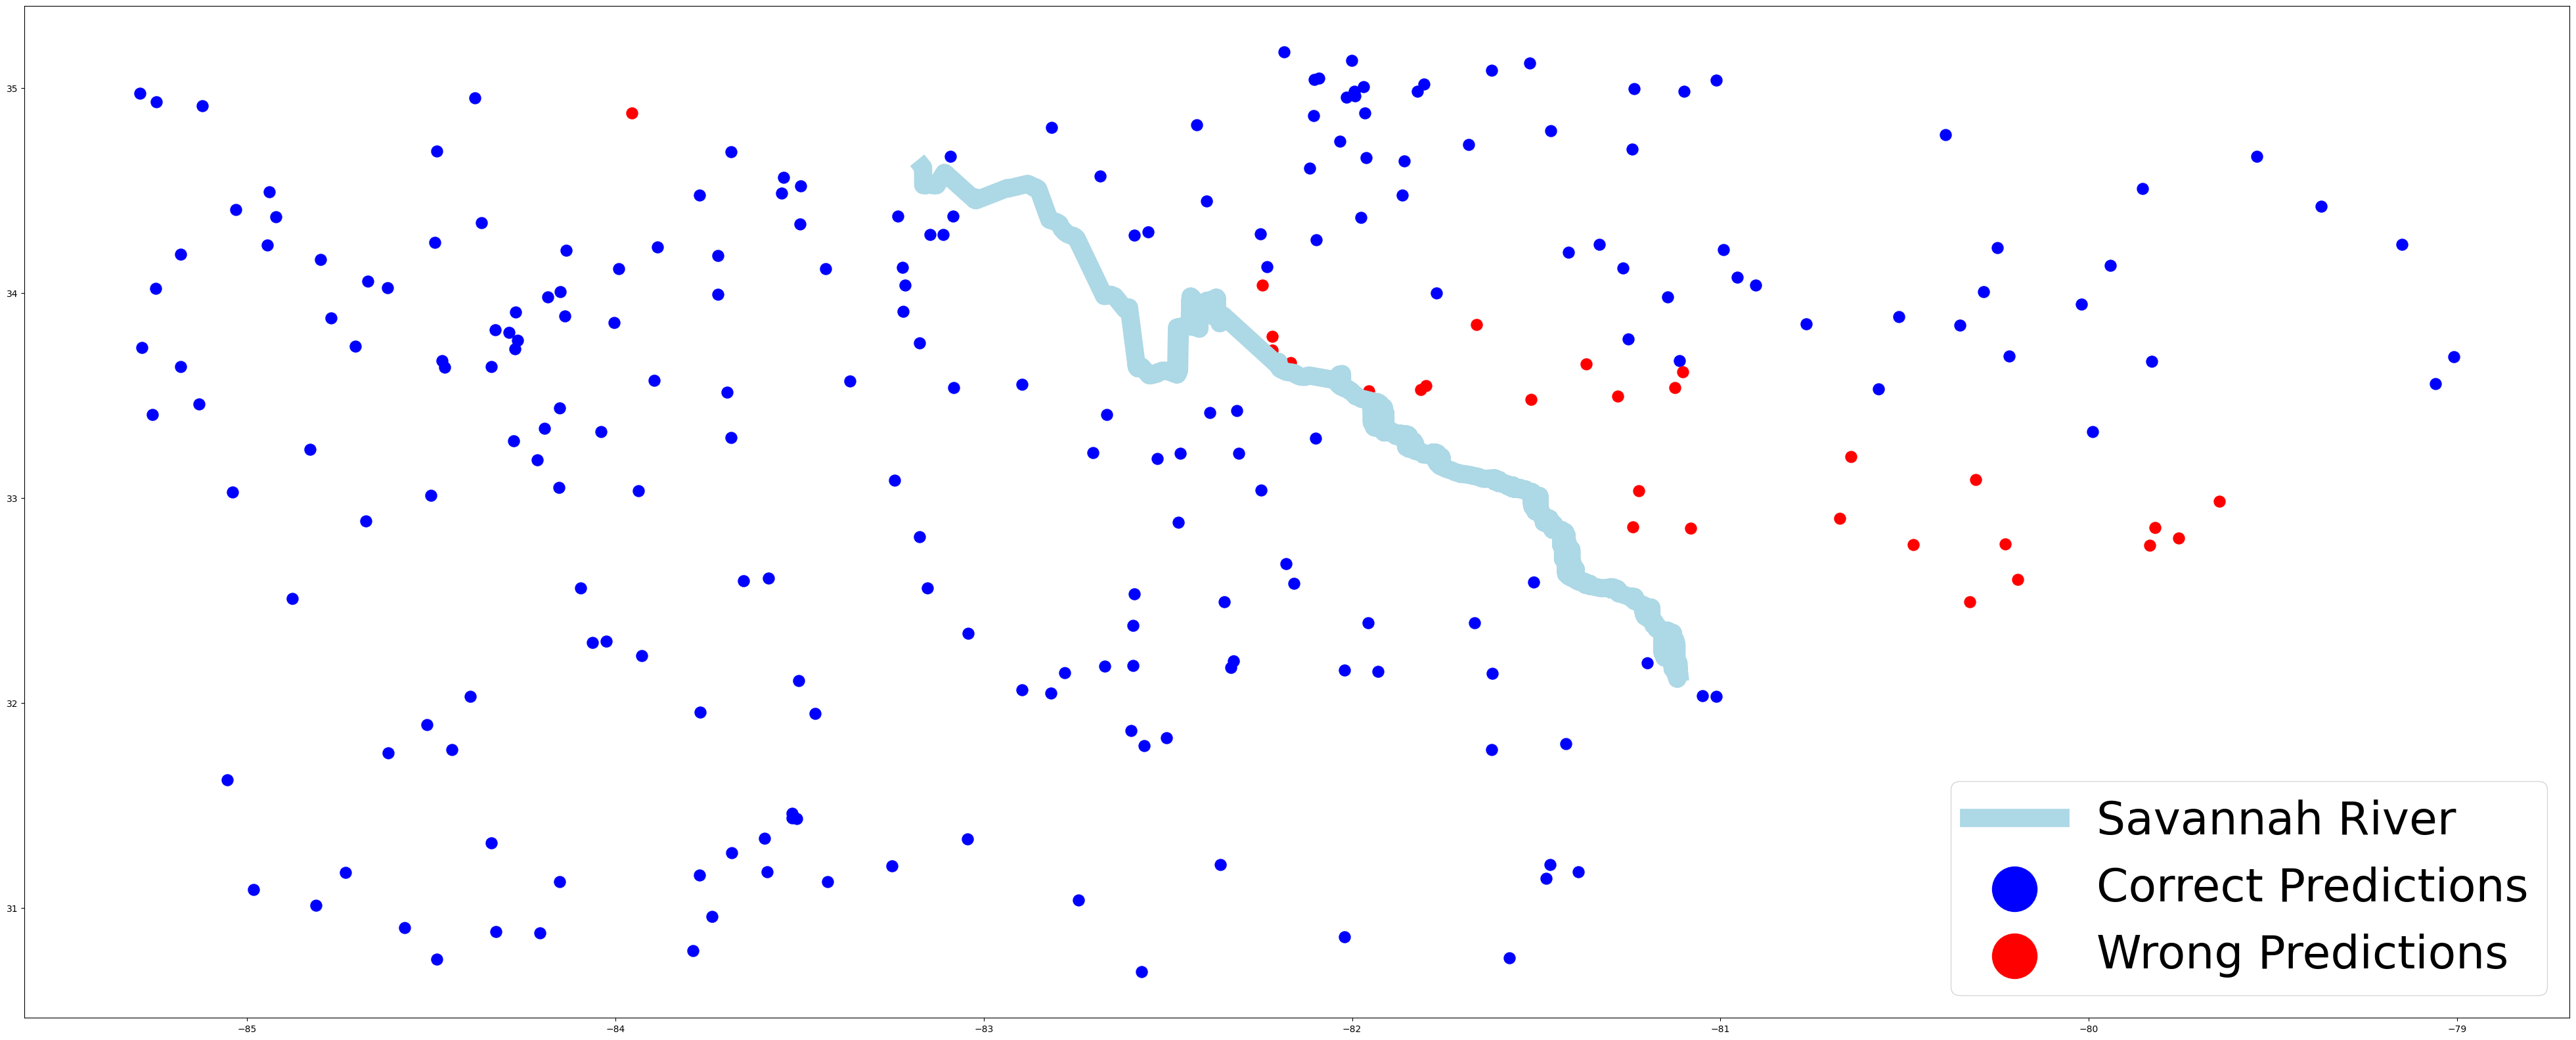

In [17]:

fig = plt.figure(figsize=(50, 20))
plt.plot(river['0'], river['1'], linewidth=20, color='lightblue');
plt.scatter(correct_X['lng'], correct_X['lat'], color='blue', s=150);
plt.scatter(mistakes_X['lng'], mistakes_X['lat'], color='red', s=150);
plt.legend(['Savannah River', 'Correct Predictions', 'Wrong Predictions'], fontsize=50, markerscale=4);

<br/>
<hr/>
<br/>

<center>
Neurons under a microscope<br/>
<!-- <img src="https://media.tenor.com/TlOO2MoqE8IAAAAC/neuron-brain.gif">
 -->

 <img src="https://i.redd.it/nfk7xvs6eka21.gif">
</center>


<br/>
<hr/>
<br/>